In [0]:

import numpy as np
import pylab
from scipy.io.wavfile import write
import os
import matplotlib.pyplot as plt

In [0]:
# sampling rate
Fs = 44100.0 # Hz
 
# play length
tlen = 1 # s
Ts = 1/Fs # sampling interval
t = np.arange(0, tlen, Ts) # time array


In [0]:
# generate signal
sin_freq = 440 # Hz
signal = np.sin(2*np.pi*sin_freq*t)
 
# generate noise
noise = np.random.normal(size = len(t))*0.5
 
# signal + noise
signal_n = signal + noise


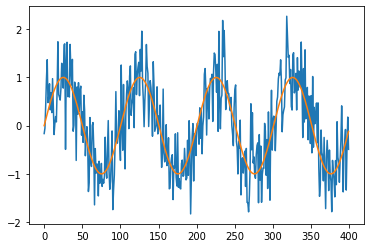

In [4]:
plt.plot(signal_n[:400])
plt.plot(signal[:400])

(0, 22050.0)

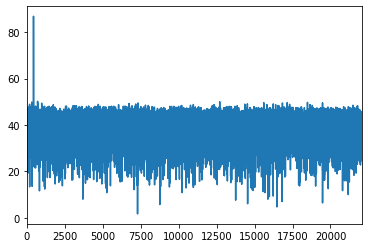

In [5]:
# fft
signal_f = np.fft.fft(signal_n)
freq = np.fft.fftfreq(len(t), Ts)
 
# plot
pylab.plot(freq, 20*np.log10(np.abs(signal_f)))
pylab.xlim(0, Fs/2)


In [0]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [0]:
import math
import numpy as np

def complexSignal(f1, f2, a1, a2, data_points = 3000, dT = 0.01,noisy = True,
                  mean = 0, std = 1,separate_signals = False):
    
    if noisy:
        noise = np.random.normal(mean, std, size=data_points)*5
    else:
        noise = np.zeros(shape=(data_points))
    
    tremor1 = []
    tremor2 = []
    
    frequencies = np.zeros(shape=(2, data_points))

    t = 0

    for i in range(data_points):
        t += dT
        tremor1.append(a1*math.sin(2 * math.pi * f1 * t + math.pi*f1))
        tremor2.append(a2* math.cos(2 * math.pi * f2 * t))
        if a1 > a2:
            frequencies[0][i] = f1
            frequencies[1][i] = f2
        else:
            frequencies[0][i] = f2
            frequencies[1][i] = f1
    if separate_signals:
        return tremor1, tremor2, noise
    else:
        return np.array(tremor1) + np.array(tremor2) + noise, frequencies

In [0]:
import random

In [0]:

tremor1 = []
tremor2 = []
tremor3 = []
tremor4 = []
data_points = 1000

t = 0
f1 = random.randrange(0,10)
f2 = random.randrange(10,50)
f3 = random.randrange(10,50)
f4 = random.randrange(10,50)

a1 = random.randint(200,300)
a2 = random.randint(0,100)
a3 = random.randint(0,100)
a4 = random.randint(0,100)

for i in range(data_points):
  t+=0.01
  tremor1.append(a1*math.sin(2 * math.pi * f1 * t ))
  tremor2.append(a2* math.cos(2 * math.pi * f2 * t))
  tremor3.append(a3*math.cos(2*math.pi*f3*t))
  tremor4.append(a3*math.sin(2*math.pi*f3*t))
  
tremor = np.array(tremor1) + np.array(tremor2)+  np.array(tremor3) +np.array(tremor4)

In [0]:
f1 = 7.0
f2 = 5.25
a1 = 128
a2 = 153
dT = 0.01
data_points = 1000
timesteps = [i*dT for i in range(data_points)]

simulated_signal, frequencies = complexSignal(f1, f2, a1, a2, data_points = data_points)
tremor1, tremor2, noise = complexSignal(f1, f2, a1, a2, data_points = data_points, separate_signals = True)

In [0]:
#tremor = np.array(tremor1)+np.array(tremor2)

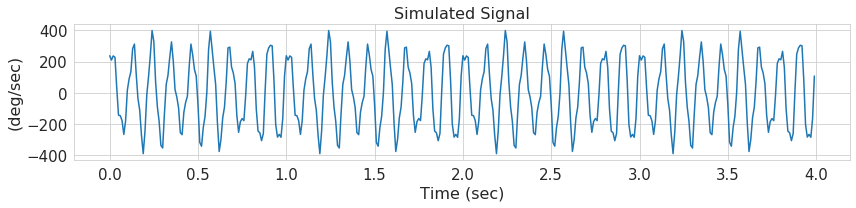

In [55]:
# plot signal
plt.figure(figsize=(12, 3))
plt.title("Simulated Signal", size = 16)
plt.ylabel("(deg/sec)", size = 16)
plt.xlabel("Time (sec)", size = 16)
plt.xticks(size=15)
plt.yticks(size=15)
plt.plot(timesteps[:400], tremor[:400])
plt.tight_layout()

plt.show()

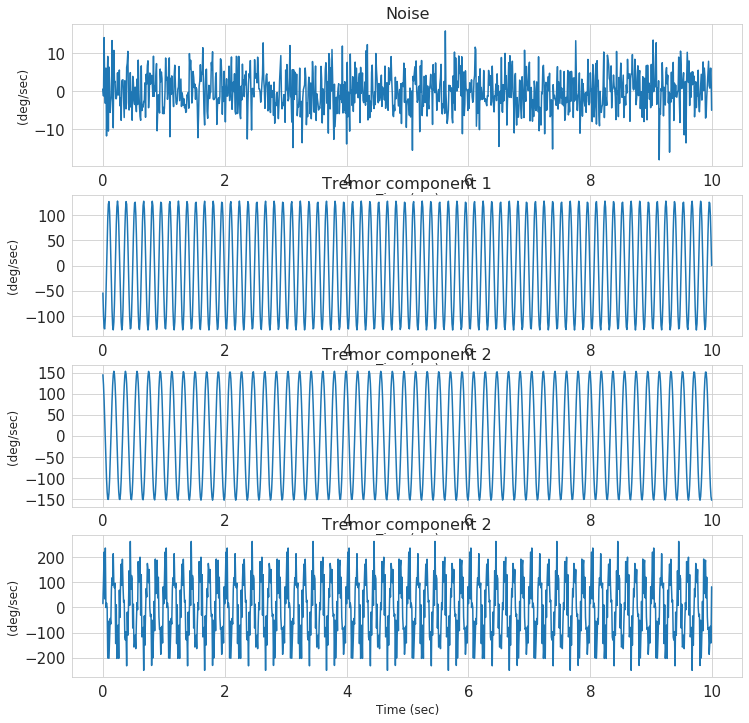

In [43]:
# plot signals

plt.figure(figsize=(12, 12))
plt.subplot(411)
plt.title("Noise", size = 16)
plt.ylabel("(deg/sec)", size = 12)
plt.xlabel("Time (sec)", size = 12)
plt.xticks(size=15)
plt.yticks(size=15)
plt.plot(timesteps, noise)

plt.subplot(412)
plt.title("Tremor component 1", size = 16)
plt.ylabel("(deg/sec)", size = 12)
plt.xlabel("Time (sec)", size = 12)
plt.xticks(size=15)
plt.yticks(size=15)
plt.plot(timesteps, tremor1)

plt.subplot(413)
plt.title("Tremor component 2", size = 16)
plt.ylabel("(deg/sec)", size = 12)
plt.xlabel("Time (sec)", size = 12)
plt.xticks(size=15)
plt.yticks(size=15)
plt.plot(timesteps, tremor2)

plt.subplot(414)
plt.title("Tremor component 2", size = 16)
plt.ylabel("(deg/sec)", size = 12)
plt.xlabel("Time (sec)", size = 12)
plt.xticks(size=15)
plt.yticks(size=15)
plt.plot(timesteps, tremor)

# plt.subplot(414)
# plt.title("Simulated Signal", size = 16)
# plt.ylabel("(deg/sec)", size = 12)
# plt.xlabel("Time (sec)", size = 12)
# plt.xticks(size=15)
# plt.yticks(size=15)
# plt.plot(timesteps, simulated_signal)
# plt.tight_layout()

plt.show()

(0, 22050.0)

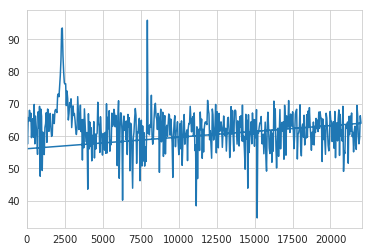

In [0]:
# fft
signal_f = np.fft.fft(simulated_signal)
freq = np.fft.fftfreq(len(simulated_signal), Ts)
 
# plot
pylab.plot(freq, 20*np.log10(np.abs(signal_f)))
pylab.xlim(0, Fs/2)

In [0]:
import pandas as pd
a = pd.DataFrame(simulated_signal,tremor)

In [0]:
a.to_csv("simulated_signal.csv")